# Loan Predictor

## Gagan G M

## Loading Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading Dataset

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
# x = df.iloc[:, 0:12].values
# y = df.iloc[:, 12].values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [3]:
print(train_df.shape)
train_df.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
train_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [7]:
train_df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

## Exploratory Data Analysis

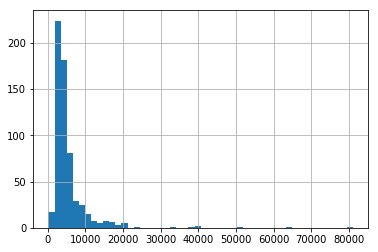

In [8]:
train_df['ApplicantIncome'].hist(bins=50)

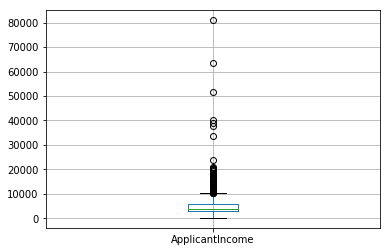

In [9]:
train_df.boxplot(column = 'ApplicantIncome')

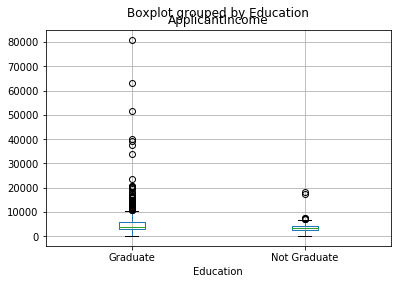

In [10]:
train_df.boxplot(column = 'ApplicantIncome', by = 'Education')

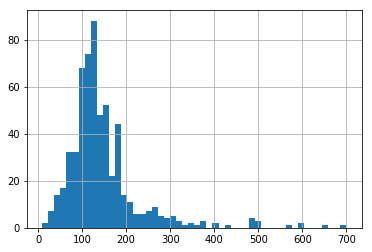

In [11]:
train_df['LoanAmount'].hist(bins=50)

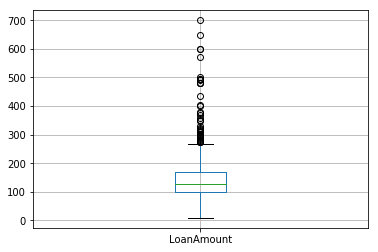

In [12]:
train_df.boxplot(column = 'LoanAmount')

## Categorical Variable Analysis

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
Gender            Female      Male
Credit_History                    
0.0             0.058824  0.086957
1.0             0.761905  0.803665


Text(0.5,1,'Probability of getting loan by credit history')

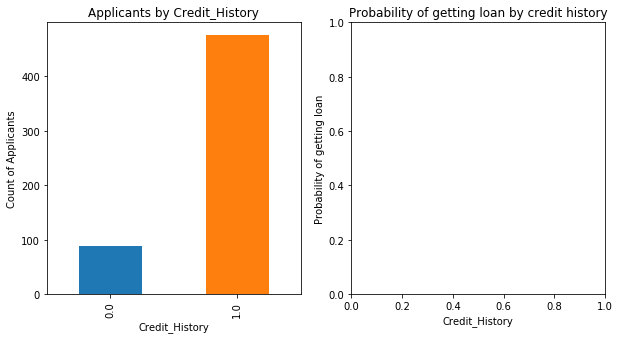

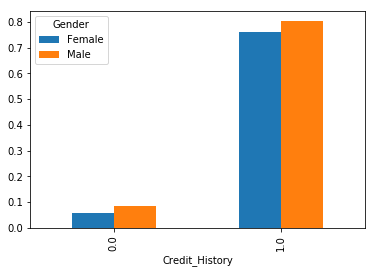

In [13]:
temp1 = train_df['Credit_History'].value_counts(ascending=True)
temp2 = train_df.pivot_table(values='Loan_Status',index=['Credit_History'],columns=['Gender'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:') 
print(temp1)

print('\nProbility of getting loan for each Credit History class:') 
print(temp2)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
temp1.plot(kind='bar')
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")


ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

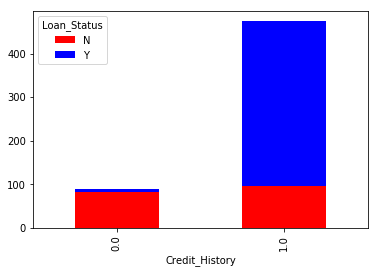

In [14]:
temp3 = pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

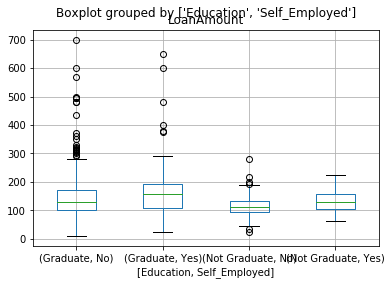

In [15]:
train_df.boxplot(column  = 'LoanAmount', by = ['Education','Self_Employed'])

## Data Handling

In [114]:
trainDF = train_df.copy()
testDF = test_df.copy()

In [115]:
trainDF.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [116]:
testDF.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [120]:
trainDF.loc[:, 'Gender'].head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

### Handling missing values in numeric variable

In [121]:
trainDF.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [124]:
for var in trainDF.columns:
    if (trainDF[var].dtypes == int) |(trainDF[var].dtypes == float):
#         trainDF[var].loc[trainDF[var].isnull()] = trainDF[var].mean()
        trainDF[var] = trainDF[var].fillna(trainDF[var].mean())
        testDF[var] = testDF[var].fillna(testDF[var].mean())

In [126]:
(trainDF.isnull().sum(), testDF.isnull().sum())

(Loan_ID               0
 Gender               13
 Married               3
 Dependents           15
 Education             0
 Self_Employed        32
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount            0
 Loan_Amount_Term      0
 Credit_History        0
 Property_Area         0
 Loan_Status           0
 dtype: int64, Loan_ID               0
 Gender               11
 Married               0
 Dependents           10
 Education             0
 Self_Employed        23
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount            0
 Loan_Amount_Term      0
 Credit_History        0
 Property_Area         0
 dtype: int64)

### Handling missing values in categorical variable

In [87]:
trainDF['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [143]:
# A = {'a':[1,2,3,]}
# B = {'a':[1,2,3,]}
# pd.DataFrame(A).append(pd.DataFrame(B)).reset_index(drop = True)
trainDF.append(testDF).reset_index(drop = True).isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents            25
Education              0
Gender                24
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed          0
dtype: int64

In [147]:
# trainDF[i for i in trainDF.columns if trainDF[i].dtypes == object] = LabEnc.fit_transform(trainDF[i for i in trainDF.columns if trainDF[i].dtypes == object])
from sklearn.preprocessing import LabelEncoder
ObjectVarList = [i for i in trainDF.columns if trainDF[i].dtypes == object]
ObjectVarList.pop(ObjectVarList.index('Loan_ID'))
ObjectVarList.pop(ObjectVarList.index('Loan_Status'))
for var in ObjectVarList:
    print('Filling mising values in the variable:', var)
    trainDF[var] = trainDF[var].fillna(trainDF[var].describe().top)
    testDF[var] = testDF[var].fillna(testDF[var].describe().top)

Filling mising values in the variable: Gender
Filling mising values in the variable: Married
Filling mising values in the variable: Dependents
Filling mising values in the variable: Education
Filling mising values in the variable: Self_Employed
Filling mising values in the variable: Property_Area


In [149]:
print(trainDF.loc[trainDF['Self_Employed'].isnull()].head())
print(testDF.loc[testDF['Self_Employed'].isnull()].head())

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area]
Index: []


In [150]:
trainDF.append(testDF).reset_index(drop = True).isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
dtype: int64

In [151]:
table = trainDF.pivot_table(values='LoanAmount', 
                       index='Self_Employed', 
                       columns='Education', 
                       aggfunc=np.median)
print (table.unstack())

Education     Self_Employed
Graduate      No               131.0
              Yes              152.0
Not Graduate  No               115.0
              Yes              130.0
dtype: float64


In [152]:
table = testDF.pivot_table(values='LoanAmount', 
                       index='Self_Employed', 
                       columns='Education', 
                       aggfunc=np.median)
print (table.unstack())

Education     Self_Employed
Graduate      No               130.0
              Yes              137.0
Not Graduate  No               120.5
              Yes              119.0
dtype: float64


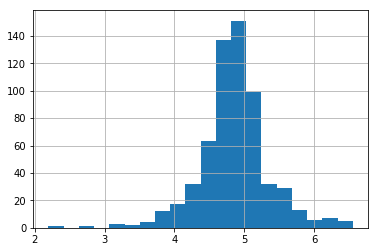

In [153]:
trainDF['LoanAmount_log'] = np.log(trainDF['LoanAmount'])
trainDF['LoanAmount_log'].hist(bins=20)

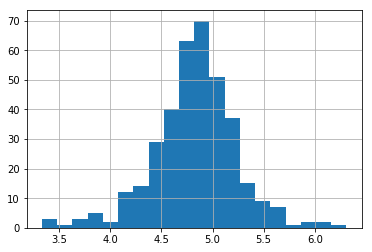

In [154]:
testDF['LoanAmount_log'] = np.log(testDF['LoanAmount'])
testDF['LoanAmount_log'].hist(bins=20)

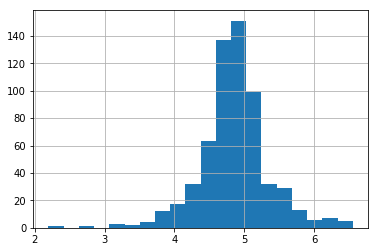

In [155]:
trainDF['TotalIncome'] = trainDF['ApplicantIncome'] + trainDF['CoapplicantIncome']
trainDF['TotalIncome_log'] = np.log(trainDF['TotalIncome'])
trainDF['LoanAmount_log'].hist(bins=20) 

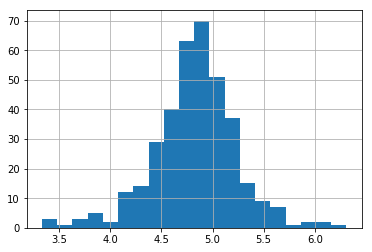

In [156]:
testDF['TotalIncome'] = testDF['ApplicantIncome'] + testDF['CoapplicantIncome']
testDF['TotalIncome_log'] = np.log(testDF['TotalIncome'])
testDF['LoanAmount_log'].hist(bins=20)

In [160]:
trainDF.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [161]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
LoanAmount_log       614 non-null float64
TotalIncome          614 non-null float64
TotalIncome_log      614 non-null float64
dtypes: float64(7), int64(1), object(8)
memory usage: 76.8+ KB


## Feature Scaling

In [162]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for var in trainDF.columns:
    if (trainDF[var].dtypes == int) | (trainDF[var].dtypes == float):
#         trainDF[var].loc[trainDF[var].isnull()] = trainDF[var].mean()
        trainDF[[var]] = sc.fit_transform(trainDF[[var]])
        testDF[[var]] = sc.transform(testDF[[var]])

### Encoding the categorical variables

In [164]:
trainDF.loc[:, 'Gender'].head()
# trainDF.dtypes

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

In [166]:
# trainDF[i for i in trainDF.columns if trainDF[i].dtypes == object] = LabEnc.fit_transform(trainDF[i for i in trainDF.columns if trainDF[i].dtypes == object])
from sklearn.preprocessing import LabelEncoder
ObjectVarList = [i for i in trainDF.columns if trainDF[i].dtypes == object]
ObjectVarList.pop(ObjectVarList.index('Loan_ID'))
ObjectVarList.pop(ObjectVarList.index('Loan_Status'))
for i in ObjectVarList:
    print('Transforming the variable', i)
    LabEnc = LabelEncoder()
    trainDF[i] = LabEnc.fit_transform(trainDF.loc[:, i].astype(str))
    testDF[i] = LabEnc.transform(testDF.loc[:, i].astype(str))

# LabEnc_test = LabelEncoder()
# testDF = LabEnc_test.transform(testDF.astype(str))

Transforming the variable Married
Transforming the variable Dependents
Transforming the variable Education
Transforming the variable Self_Employed
Transforming the variable Property_Area


In [167]:
trainDF.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,0.072991,-0.554487,0.000000,0.279851,0.45164,2,Y,0.250640,-0.182184,0.008468
1,LP001003,1,1,1,0,0,-0.134412,-0.038732,-0.219273,0.279851,0.45164,0,N,-0.020226,-0.144684,0.082903
2,LP001005,1,1,0,0,1,-0.393747,-0.554487,-0.957641,0.279851,0.45164,2,Y,-1.355202,-0.623656,-1.217363
3,LP001006,1,1,0,1,0,-0.462062,0.251980,-0.314547,0.279851,0.45164,2,Y,-0.150299,-0.322885,-0.301273
4,LP001008,1,0,0,0,0,0.097728,-0.554487,-0.064454,0.279851,0.45164,2,Y,0.174727,-0.158785,0.055266


## Splitting the Dataset

In [ ]:
TrainDF_Full_x = trainDF.iloc[:, 1:12]
TrainDF_Full_y = trainDF.iloc[:, 12]
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
TrainDF_x , ValDF_x, TrainDF_y, ValDF_y = train_test_split(TrainDF_Full_x, TrainDF_Full_y, test_size = 0.20, random_state = 0)

In [ ]:
print(TrainDF_x.shape, ValDF_x.shape)
TrainDF_x.head()

# Building a Model


## Decision Tree

### Fitting Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6,random_state = 0)
classifier.fit(TrainDF_x, TrainDF_y)

In [ ]:
y_pred = classifier.predict(ValDF_x)
from sklearn.metrics import confusion_matrix, accuracy_score
print("On Train Data. \nAccuracy = ", accuracy_score(ValDF_y, y_pred))
confusion_matrix(ValDF_y, y_pred)
# (y_true, y_pred, labels=None, sample_weight=None

### Cross-Validation

In [ ]:
classifier_cv = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6,random_state = 0)
AccScore_cv = cross_val_score(estimator = classifier_cv, X = TrainDF_Full_x, y = TrainDF_Full_y, cv = 10)
AccScore_cv.mean()

### Hyper Parameter Tuning

In [ ]:
AccScore_entropy_list = []
AccScore_gini_list = []
for i in range(1,100):
    classifier_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = i,random_state = 0)
    classifier_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = i,random_state = 0)
    AccScore_entropy = cross_val_score(estimator = classifier_entropy, X = TrainDF_Full_x, y = TrainDF_Full_y, cv = 10)
    AccScore_gini = cross_val_score(estimator = classifier_gini, X = TrainDF_Full_x, y = TrainDF_Full_y, cv = 10)
    AccScore_entropy_list.append(AccScore_entropy.mean())
    AccScore_gini_list.append(AccScore_gini.mean())

fig = plt.figure(figsize=(10,5))
plt.plot(AccScore_entropy_list, label = "criteria: entropy")
plt.plot(AccScore_gini_list, label = "criteria: gini")
plt.xlabel("Tree property: max_depth")
plt.ylabel("Score")
plt.title("Tree Property VS Score")
plt.legend()
plt.show()


In [ ]:
from sklearn import grid_search

parameters = {'criterion': ['entropy', 'gini'],
              'max_depth': [i for i in range(1,5)],
              'min_samples_split' : [0.25, 0.5, 0.75, 1.0, 2],
              'min_samples_leaf' : [1,2,3]
             }
classifier_GS = grid_search.GridSearchCV(DecisionTreeClassifier(), parameters)
classifier_GS.fit(X = TrainDF_Full_x, y = TrainDF_Full_y)
tree_model = classifier_GS.best_estimator_
print (classifier_GS.best_score_, classifier_GS.best_params_)

In [ ]:
classifier_cv = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, min_samples_leaf = 1, min_samples_split = 0.25)
AccScore_cv = cross_val_score(estimator = classifier_cv, X = TrainDF_Full_x, y = TrainDF_Full_y, cv = 10)
AccScore_cv.mean()

## Random Forest
### Fitting Random Forest Classifier

In [ ]:
# testDF['LoanStatus_pred'] = classifier.predict(testDF.iloc[:,2:])
from sklearn.ensemble import RandomForestClassifier
RFClassifier = RandomForestClassifier(n_estimators = 80, criterion = 'entropy', random_state = 0)
RFClassifier.fit(TrainDF_x, TrainDF_y)

In [ ]:
y_predRF = RFClassifier.predict(ValDF_x)
from sklearn.metrics import confusion_matrix, accuracy_score
print("On Train Data. \nAccuracy = ", accuracy_score(ValDF_y, y_predRF))
confusion_matrix(ValDF_y, y_predRF)
# (y_true, y_pred, labels=None, sample_weight=None

In [ ]:
TrainDF_y

### Cross Validation for RFC

In [ ]:
classifier_rf = RandomForestClassifier(criterion = 'entropy', max_depth = 6,random_state = 0)
AccScore_rf = cross_val_score(estimator = classifier_rf, X = TrainDF_Full_x, y = TrainDF_Full_y, cv = 10)
AccScore_rf.mean()
# AccScore_rf.std()

 ### Hyper Parameter Tuning for RFC

In [ ]:
AccScore_entropy_list = []
AccScore_gini_list = []
for i in range(1,100):
    classifier_entropy = RandomForestClassifier(criterion = 'entropy', max_depth = i,random_state = 0)
    classifier_gini = RandomForestClassifier(criterion = 'gini', max_depth = i,random_state = 0)
    AccScore_entropy = cross_val_score(estimator = classifier_entropy, X = TrainDF_Full_x, y = TrainDF_Full_y, cv = 10)
    AccScore_gini = cross_val_score(estimator = classifier_gini, X = TrainDF_Full_x, y = TrainDF_Full_y, cv = 10)
    AccScore_entropy_list.append(AccScore_entropy.mean())
    AccScore_gini_list.append(AccScore_gini.mean())

fig = plt.figure(figsize=(10,5))
plt.plot(AccScore_entropy_list, label = "criteria: entropy")
plt.plot(AccScore_gini_list, label = "criteria: gini")
plt.xlabel("Tree property: max_depth")
plt.ylabel("Score")
plt.title("Tree Property VS Score")
plt.legend()
plt.show

In [ ]:
from sklearn import grid_search

parameters = {'criterion': ['entropy', 'gini'],
              'max_depth': [i for i in range(1, 10)],
              'min_samples_split' : [2, 4, 6, 8, 10],
              'min_samples_leaf' : [1,2,3]
             }
classifier_GS = grid_search.GridSearchCV(RandomForestClassifier(), parameters)
classifier_GS.fit(X = TrainDF_Full_x, y = TrainDF_Full_y)
tree_model = classifier_GS.best_estimator_
print (classifier_GS.best_score_, classifier_GS.best_params_)

In [ ]:
classifier_rf = RandomForestClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 2, min_samples_split = 8)
AccScore_rf = cross_val_score(estimator = classifier_rf, X = TrainDF_Full_x, y = TrainDF_Full_y, cv = 10)
AccScore_rf.mean()

## XGboost

### Fitting XGBoost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(TrainDF_x, TrainDF_y)